<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/ntebooks/Monte_Carlo_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


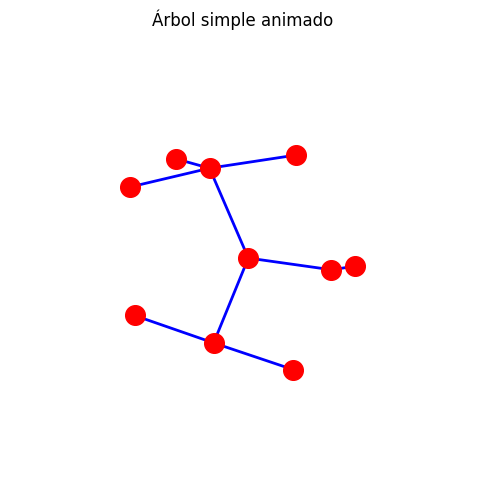

Guardado MP4 en: arbol_anim.mp4
Guardado GIF en: arbol_anim.gif


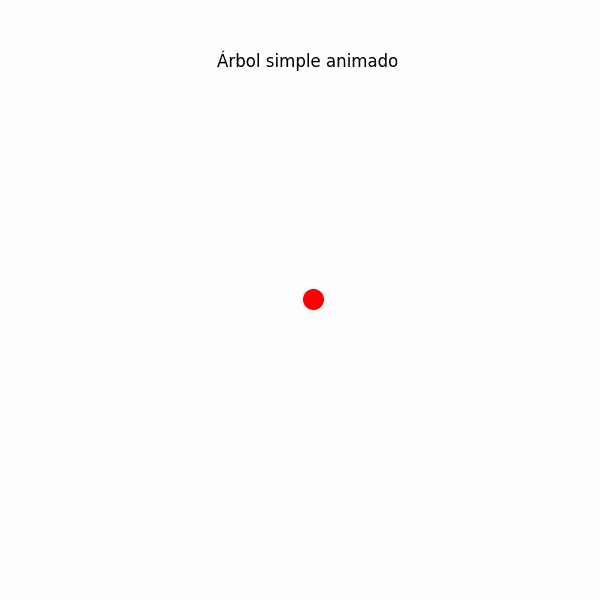

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, Image
import networkx as nx  # usaremos networkx para gestionar el grafo y layout

##############################################
# 1. CREAR O SIMULAR EL ÁRBOL
##############################################

# Creamos un árbol simple con 1 raíz y algunos hijos
# Usaremos NetworkX para manejarlo más fácilmente.

G = nx.DiGraph()

# Agregamos nodos y aristas manualmente
G.add_node("Raíz")
G.add_edge("Raíz", "A")
G.add_edge("Raíz", "B")
G.add_edge("Raíz", "C")

G.add_edge("A", "A1")
G.add_edge("A", "A2")
G.add_edge("B", "B1")
G.add_edge("C", "C1")
G.add_edge("C", "C2")
G.add_edge("C", "C3")

# Extraemos la lista de nodos en un posible orden BFS (para animar)
# Así, iremos mostrando nodos poco a poco.
bfs_order = list(nx.bfs_tree(G, source="Raíz"))
# Ejemplo: ['Raíz', 'A', 'B', 'C', 'A1', 'A2', 'B1', 'C1', 'C2', 'C3']

# Para animar aristas, necesitamos saber:
#   en qué momento consideramos "activas" las aristas
#   (cuando ambos nodos están visibles).
edges_list = list(G.edges())  # [('Raíz','A'),('Raíz','B'), etc.]

##############################################
# 2. CALCULAR POSICIONES (LAYOUT)
##############################################

# Probamos un layout jerárquico con graphviz (dot).
# En Colab, a veces se requiere instalar graphviz/pygraphviz con:
# !apt-get install graphviz
# !pip install pygraphviz

# Si no tienes pygraphviz, usa spring_layout u otro layout
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
except:
    # fallback: force layout
    pos = nx.spring_layout(G)

##############################################
# 3. CONFIGURAR FIGURA PARA ANIMAR
##############################################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_title("Árbol simple animado")
ax.set_axis_off()

# Límites del gráfico (puedes ajustarlos para que se vean todos los nodos)
x_vals = [pos[n][0] for n in G.nodes()]
y_vals = [pos[n][1] for n in G.nodes()]
margin = 1.0
ax.set_xlim(min(x_vals)-margin, max(x_vals)+margin)
ax.set_ylim(min(y_vals)-margin, max(y_vals)+margin)

# Creamos un scatter plot inicial (sin datos)
scatter = ax.scatter([], [], s=200, c='red', zorder=3)

# Manejaremos las líneas de edges (aristas) con una lista de line objects
lines = []

##############################################
# 4. FUNCIÓN DE ACTUALIZACIÓN
##############################################

def update(frame):
    """
    frame: indica cuántos nodos mostrar (0-index)
    """
    global lines  # para manipular las líneas

    # Limpiamos líneas viejas
    for ln in lines:
        ln.remove()
    lines = []

    # Nodos a mostrar hasta este frame
    # frame=0 => solo 1 nodo, frame=1 => 2 nodos, etc.
    current_nodes = bfs_order[:frame+1]

    # Extraemos posiciones (x,y) de current_nodes
    xs = []
    ys = []
    for node in current_nodes:
        x, y = pos[node]
        xs.append(x)
        ys.append(y)
    scatter.set_offsets(np.column_stack([xs, ys]))

    # Dibujar edges (aristas) que conecten nodos visibles
    visible_edges = [(u,v) for (u,v) in edges_list
                     if (u in current_nodes and v in current_nodes)]

    for (u,v) in visible_edges:
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        ln = ax.plot([x1, x2], [y1, y2], c='blue', lw=2, zorder=2)
        lines.append(ln[0])  # ln es una lista con un objeto Line2D

    return (scatter,)

##############################################
# 5. CREAR LA ANIMACIÓN
##############################################

frames_total = len(bfs_order)
ani = FuncAnimation(fig, update, frames=frames_total,
                    interval=1000, blit=False, repeat=True)

# Para ver en Colab como HTML
display(HTML(ani.to_jshtml()))

plt.show()

##############################################
# 6. GUARDAR A MP4 Y GIF
##############################################

# Para MP4 se requiere ffmpeg instalado
mp4_path = "arbol_anim.mp4"
ani.save(mp4_path, writer='ffmpeg', fps=1)  # fps=1 => 1 frame/seg

print(f"Guardado MP4 en: {mp4_path}")

# Para GIF
gif_path = "arbol_anim.gif"
ani.save(gif_path, writer=PillowWriter(fps=1))
print(f"Guardado GIF en: {gif_path}")

# Visualizar la GIF en Colab
display(Image(gif_path))

# Descarga de archivos en Colab
from google.colab import files
files.download(mp4_path)
files.download(gif_path)

